In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import requests
import json
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression 

In [2]:
# Load the CSV file from Kaggle into Pandas DataFrame
top_songs = pd.read_csv("Resources/10years_top10s.csv")

top_songs.head(5)

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [3]:
top_songs = pd.read_csv("Resources/10years_top10s.csv")

# Clean grouped_data removing any columns that are too out of range to be useful.
top_songs.drop(['live', 'val', 'acous'], axis=1)

# Rename columns.  
top_songs = top_songs.rename(columns={'title': 'Title', 'artist': 'Artist', 'top genre': 'Genre', 'year': 'Year', 'bpm': 'BPM', 'nrgy': 'Energy', 'dnce': 'Dance', 'dB': 'Decibels (dB)', 'live': 'Live', 'val': 'Valence', 'dur': 'Duration', 'acous': 'Acousticness', 'spch': 'Speechiness', 'pop': 'Popularity'})

# Display the first 5 rows of the grouped dataframe
top_songs.head()


,Unnamed: 0,Title,Artist,Genre,Year,BPM,Energy,Dance,Decibels (dB),Live,Valence,Duration,Acousticness,Speechiness,Popularity
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [4]:
# Splitting and creating DataFrame from 2015 - 2019


# Filter the data for the years 2016, 2017, 2018, and 2019
five_year_data = top_songs[top_songs['Year'].isin([2015, 2016, 2017, 2018, 2019])]
five_year_data

,Unnamed: 0,Title,Artist,Genre,Year,BPM,Energy,Dance,Decibels (dB),Live,Valence,Duration,Acousticness,Speechiness,Popularity
268,269,Thinking out Loud,Ed Sheeran,pop,2015,79,45,78,-6,18,59,282,47,3,84
269,270,I'm Not The Only One,Sam Smith,pop,2015,82,49,68,-6,8,49,239,53,4,84
270,271,The Hills,The Weeknd,canadian contemporary r&b,2015,113,56,58,-7,14,14,242,7,5,84
271,272,Love Yourself,Justin Bieber,canadian pop,2015,100,38,61,-10,28,52,234,84,44,83
272,273,Uptown Funk,Mark Ronson,dance pop,2015,115,61,86,-7,3,93,270,1,8,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


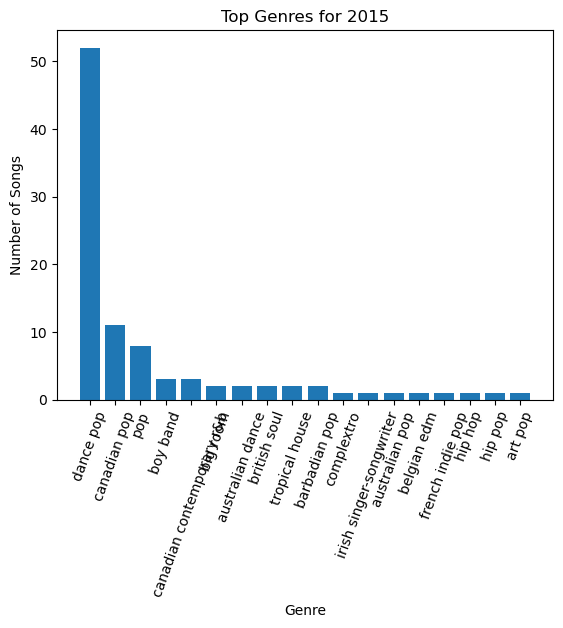

In [5]:
# Getting the top Genre for each year from 2015 - 2019



# Filter the data for year 2015
top_genres_2015 = five_year_data[five_year_data['Year'] == 2015]

# Get the value counts for the 'top genre' column
genre_counts = top_genres_2015['Genre'].value_counts()

# Create a bar graph
fig, ax = plt.subplots()
ax.bar(genre_counts.index, genre_counts.values)
ax.set_title('Top Genres for 2015')
ax.set_xlabel('Genre')
ax.set_ylabel('Number of Songs')
plt.xticks(rotation=70)

plt.show()


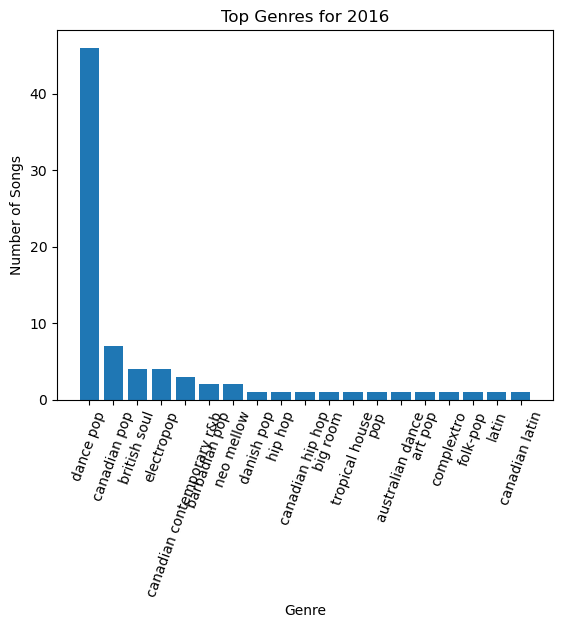

In [6]:
# Filter the data for year 2016
top_genres_2016 = five_year_data[five_year_data['Year'] == 2016]

# Get the value counts for the 'top genre' column
genre_counts = top_genres_2016['Genre'].value_counts()

# Create a bar graph
fig, ax = plt.subplots()
ax.bar(genre_counts.index, genre_counts.values)
ax.set_title('Top Genres for 2016')
ax.set_xlabel('Genre')
ax.set_ylabel('Number of Songs')
plt.xticks(rotation=70)

plt.show()

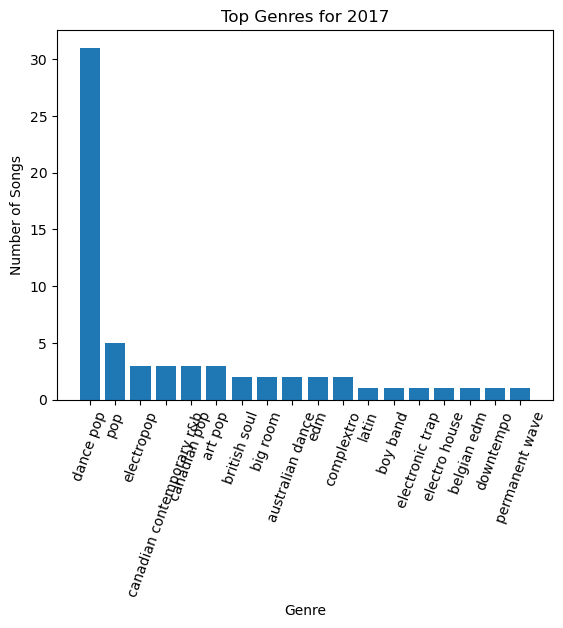

In [7]:
# Filter the data for year 2017
top_genres_2017 = five_year_data[five_year_data['Year'] == 2017]

# Get the value counts for the 'top genre' column
genre_counts = top_genres_2017['Genre'].value_counts()

# Create a bar graph
fig, ax = plt.subplots()
ax.bar(genre_counts.index, genre_counts.values)
ax.set_title('Top Genres for 2017')
ax.set_xlabel('Genre')
ax.set_ylabel('Number of Songs')
plt.xticks(rotation=70)

plt.show()

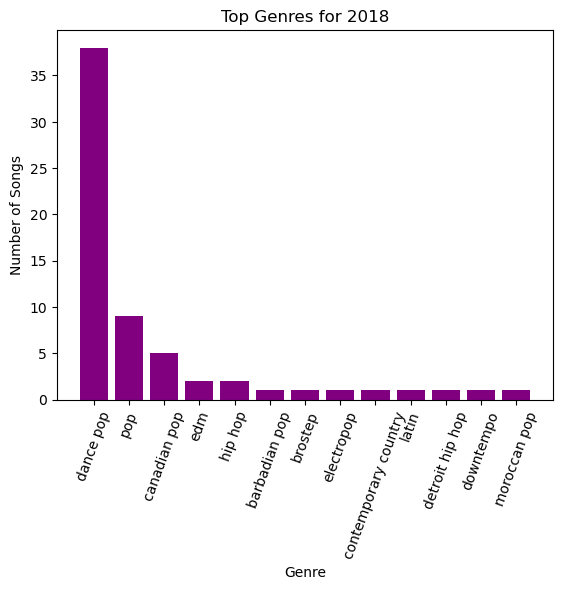

In [8]:
# Filter the data for year 2018
top_genres_2018 = five_year_data[five_year_data['Year'] == 2018]

# Get the value counts for the 'top genre' column
genre_counts = top_genres_2018['Genre'].value_counts()

# Create a bar graph
fig, ax = plt.subplots()
ax.bar(genre_counts.index, genre_counts.values, color = 'purple')
ax.set_title('Top Genres for 2018')
ax.set_xlabel('Genre')
ax.set_ylabel('Number of Songs')
plt.xticks(rotation=70)

plt.show()

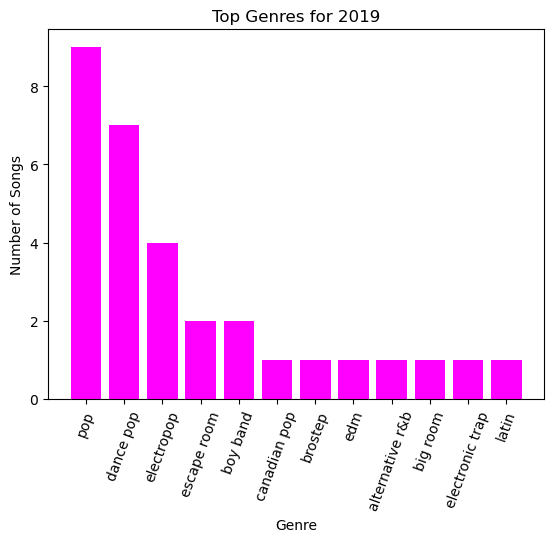

In [9]:
# Filter the data for year 2019
top_genres_2019 = five_year_data[five_year_data['Year'] == 2019]

# Get the value counts for the 'top genre' column
genre_counts = top_genres_2019['Genre'].value_counts()

# Create a bar graph
fig, ax = plt.subplots()
ax.bar(genre_counts.index, genre_counts.values, color = 'magenta')
ax.set_title('Top Genres for 2019')
ax.set_xlabel('Genre')
ax.set_ylabel('Number of Songs')
plt.xticks(rotation=70)

plt.show()

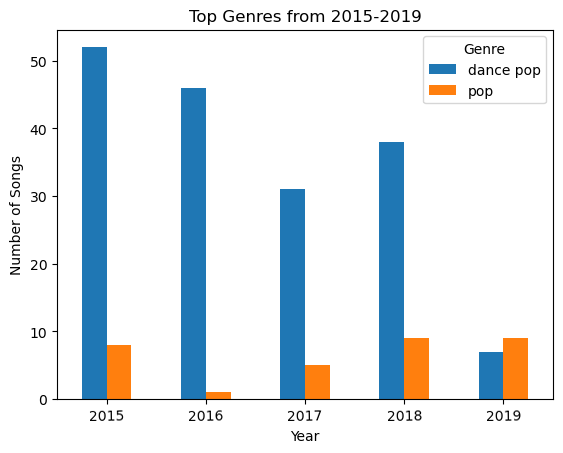

In [10]:
# Top Genres from 2015 - 2019



# Filter data for the top genres 'dance pop' and 'pop' for years 2015, 2016, 2017, 2018, and 2019
filtered_data = five_year_data[(five_year_data['Genre'].isin(['dance pop', 'pop'])) & (five_year_data['Year'].isin([2015, 2016, 2017, 2018, 2019]))]

# Group data by year and genre, and calculate the count
grouped_data = filtered_data.groupby(['Year', 'Genre']).size().unstack()

# Create bar plot
grouped_data.plot(kind='bar')

# Set axis labels and title
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.title('Top Genres from 2015-2019')
plt.xticks(rotation=True)
# Set legend
plt.legend(title='Genre')

# Show plot
plt.show()


In [11]:
#Creating a column with top ten Genres


# Extract the genre column
genre_column = five_year_data['Genre']

# Get the count of each genre
genre_counts = genre_column.value_counts()

# Sort the counts in descending order
sorted_genre_counts = genre_counts.sort_values(ascending=False)

# Get the top ten genres
top_ten_genres = pd.DataFrame(sorted_genre_counts.head(10))


top_ten_genres

,Genre
dance pop,174
pop,32
canadian pop,27
electropop,12
canadian contemporary r&b,9
british soul,8
boy band,6
big room,6
barbadian pop,5
australian dance,5


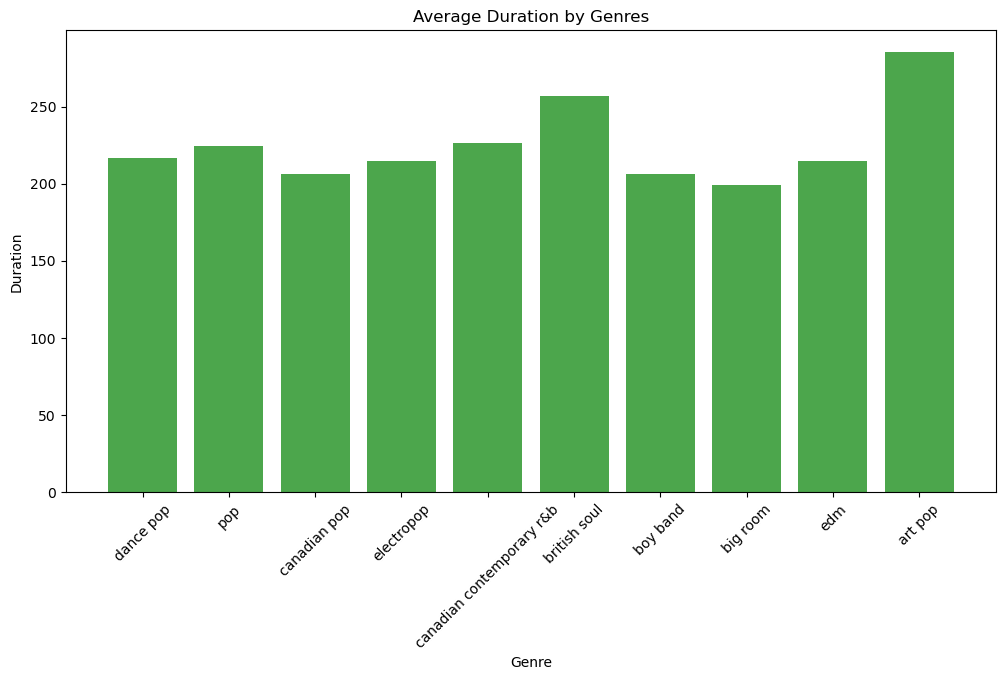

In [12]:
# Average Duration by Genres

# Get the top 10 Genre in the DataFrame
top_genres = five_year_data['Genre'].value_counts().nlargest(10).index.tolist()

# Average values for top ten genres

average_genres = five_year_data.groupby('Genre').agg({'BPM': 'mean', 'Duration': 'mean', 'Energy':'mean'}).loc[top_genres]

#create plot for average duration per Genre

plt.figure(figsize=(12, 6))
plt.bar(average_genres.index, average_genres['Duration'], color='green', alpha=0.7)

#set chartaxis labels and chart title

plt.title('Average Duration by Genres')
plt.xlabel('Genre')
plt.ylabel('Duration')
plt.xticks(rotation=45)
plt.show()

           

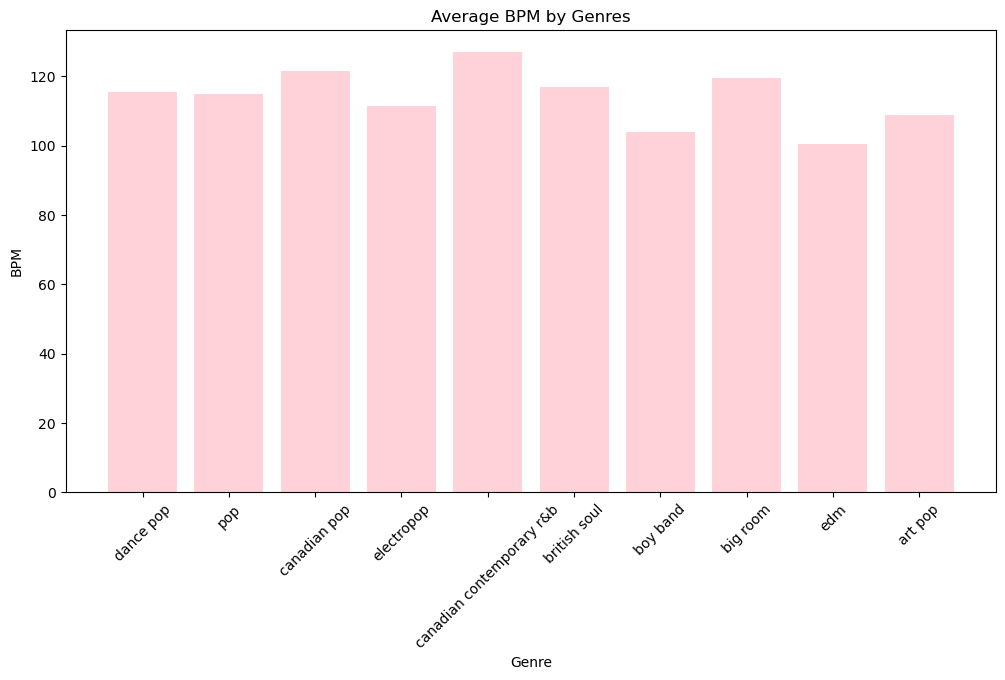

In [13]:
#Average BPM by Genres Graph



#Create plot for average duration per Genre

plt.figure(figsize=(12, 6))
plt.bar(average_genres.index, average_genres['BPM'], color='pink', alpha=0.7)

#set chartaxis labels and chart title

plt.title('Average BPM by Genres')
plt.xlabel('Genre')
plt.ylabel('BPM')
plt.xticks(rotation=45)
plt.show()


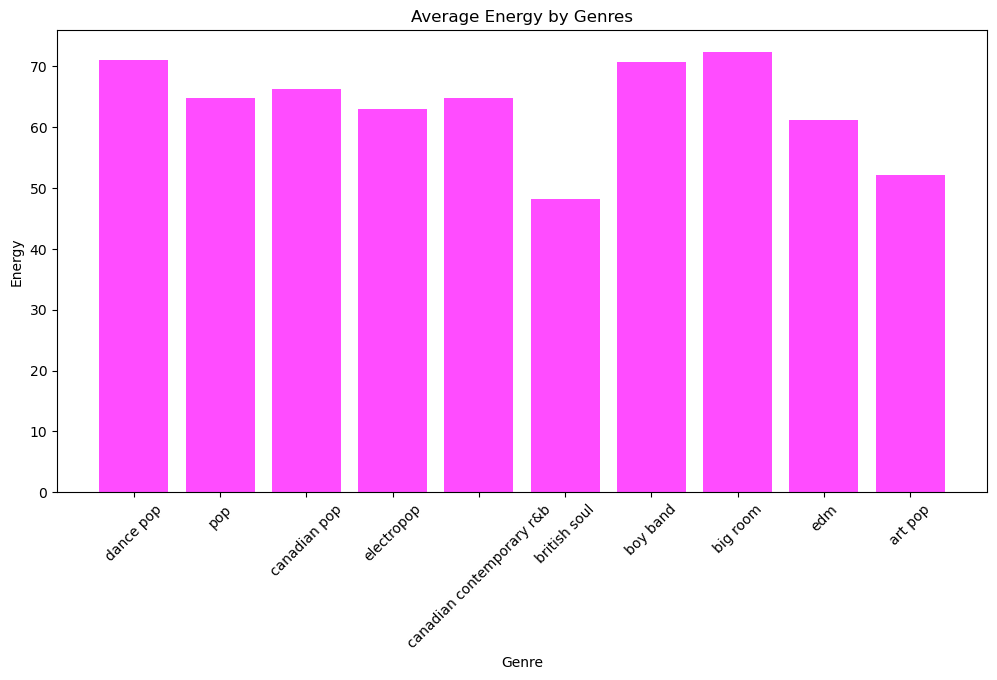

In [14]:
# Average Energy by Genres Graph


#Get the top 10 Genre in the DataFrame
top_genres = five_year_data['Genre'].value_counts().nlargest(10).index.tolist()

# Average values for top ten genres

average_genres = five_year_data.groupby('Genre').agg({'BPM': 'mean', 'Duration': 'mean', 'Energy':'mean'}).loc[top_genres]

#create plot for average duration per Genre

plt.figure(figsize=(12, 6))
plt.bar(average_genres.index, average_genres['Energy'], color='magenta', alpha=0.7)

#set chartaxis labels and chart title

plt.title('Average Energy by Genres')
plt.xlabel('Genre')
plt.ylabel('Energy')
plt.xticks(rotation=45)
plt.show()